# Hypothesis tests for distributions and time series

In [11]:
from utilities.std_imports import *
import scipy.stats as ss
import statsmodels.tsa.stattools as sts
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from IPython.display import Image

### Normality (distribution, not time series)
Null hyphotesis: not normal

In [2]:
ts = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = ss.shapiro(ts)
print('Shapiro test p-value = ', round(p,2))

stat, p =ss.normaltest(ts)
print('DAgostino test p-value = ', round(p,2))

Shapiro test p-value =  0.19
DAgostino test p-value =  0.18


C:\Users\Milton\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Correlation
Null hypothesis: not correlated

In [3]:
ts1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
ts2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = ss.pearsonr(ts1, ts2)
print('Pearson stat ', round(stat,2), ' p-value= ', round(p,2))

stat, p = ss.spearmanr(ts1, ts2)
print('Spearman stat ', round(stat,2), ' p-value= ', round(p,2))

stat, p = ss.kendalltau(ts1, ts2)
print('Kendall stat ', round(stat,2), ' p-value= ', round(p,2))

Pearson stat  0.69  p-value=  0.03
Spearman stat  0.85  p-value=  0.0
Kendall stat  0.73  p-value=  0.0


### Stationarity
Null Hypothesis: Non stationary

In [4]:
ts = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = sts.adfuller(ts)
print('Dickey-Fuller stat ', round(stat,2), ' p-value= ', round(p,2))

stat, p, lags, crit = sts.kpss(ts, nlags='auto')
print('Kwiatkowski-Phillips stat ', round(stat,2), ' p-value= ', round(p,2))

Dickey-Fuller stat  0.52  p-value=  0.99
Kwiatkowski-Phillips stat  0.59  p-value=  0.02


### Homogeneity
Just distributions, not time series 

In [9]:
ts1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
ts2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

stat, p = ssw.ztest(ts1, ts2)
print('Z stat ', round(stat,2), ' p-value= ', round(p,2))

stat, p = ss.ttest_ind(ts1, ts2)
print('Student-t stat ', round(stat,2), ' p-value= ', round(p,2))

stat, p = ss.ttest_rel(ts1, ts2)
print('Paired Student-t stat ', round(stat,2), ' p-value= ', round(p,2))

stat, p = ss.mannwhitneyu(ts1, ts2)
print('Mann-Withney stat ', round(stat,2), ' p-value= ', round(p,2))

stat, p = ss.wilcoxon(ts1, ts2)
print('Wilcoxon stat ', round(stat,2), ' p-value= ', round(p,2))

stat, p = ss.kruskal(ts1, ts2)
print('Kruskal-Wallis stat ', round(stat,2), ' p-value= ', round(p,2))

Z stat  -0.33  p-value=  0.74
Student-t stat  -0.33  p-value=  0.75
Paired Student-t stat  -0.33  p-value=  0.75
Mann-Withney stat  40.0  p-value=  0.24
Wilcoxon stat  21.0  p-value=  0.51
Kruskal-Wallis stat  0.57  p-value=  0.45


### Paired homogeneity

In [25]:
ts3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = ss.friedmanchisquare(ts1, ts2, ts3)
print('Friedman paired stat ', round(stat,2), ' p-value= ', round(p,2))

Friedman paired stat  0.8  p-value=  0.67


### ANOVA
Just distributions, not time series  
Null Hypothesis: Not from the same distribution

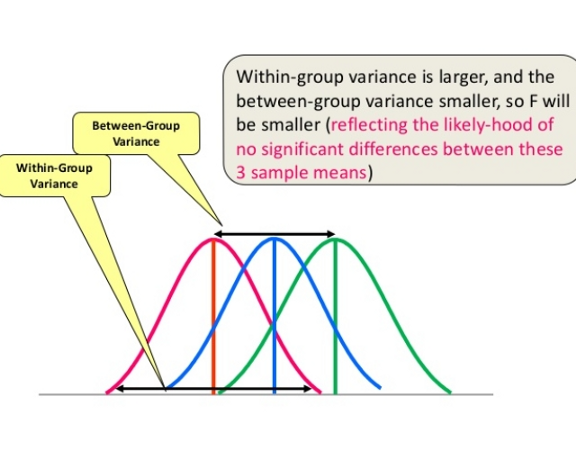

In [12]:
Image(filename='anova.png') 

In [20]:
ts1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
ts2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
ts3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = ss.f_oneway(ts1, ts2, ts3)
print('ANOVA stat ', round(stat,2), ' p-value= ', round(p,2))

ANOVA stat  0.1  p-value=  0.91


### Outlier detection
Weights give an idea of how much a particular observation is down-weighted

In [32]:
data = sm.datasets.stackloss.load()
data.exog = sm.add_constant(data.exog)
data.endog, data.exog

(array([42., 37., 37., 28., 18., 18., 19., 20., 15., 14., 14., 13., 11.,
        12.,  8.,  7.,  8.,  8.,  9., 15., 15.]),
 array([[ 1., 80., 27., 89.],
        [ 1., 80., 27., 88.],
        [ 1., 75., 25., 90.],
        [ 1., 62., 24., 87.],
        [ 1., 62., 22., 87.],
        [ 1., 62., 23., 87.],
        [ 1., 62., 24., 93.],
        [ 1., 62., 24., 93.],
        [ 1., 58., 23., 87.],
        [ 1., 58., 18., 80.],
        [ 1., 58., 18., 89.],
        [ 1., 58., 17., 88.],
        [ 1., 58., 18., 82.],
        [ 1., 58., 19., 93.],
        [ 1., 50., 18., 89.],
        [ 1., 50., 18., 86.],
        [ 1., 50., 19., 72.],
        [ 1., 50., 19., 79.],
        [ 1., 50., 20., 80.],
        [ 1., 56., 20., 82.],
        [ 1., 70., 20., 91.]]))

In [33]:
huber_t = sm.RLM(data.endog, data.exog, M=sm.robust.norms.HuberT())
hub_results = huber_t.fit()
print(hub_results.weights)

[1.         1.         0.78581298 0.5048672  1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.36809168]


### Credits & Links

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
https://www.statsmodels.org/stable/diagnostic.html?highlight=heteroscedasticity